<a href="https://colab.research.google.com/github/najmaasr/RAxHCI_DS-FinalTask/blob/main/Final_Task_RAxHCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# **Dataset**

## **Load Data**

In [ ]:
app_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FinalTaskRAxHCI/application_train.csv")
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
app_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FinalTaskRAxHCI/application_test.csv")
app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

## **About Data**

### **App_Train**

In [ ]:
app_train.shape

(307511, 122)

In [ ]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
app_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [ ]:
app_train.select_dtypes(include='object').describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

### **App_Test**

In [ ]:
app_test.shape

(48744, 121)

In [ ]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [ ]:
app_test.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [ ]:
app_test.select_dtypes(include='object').describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count               48744       48744        48744           48744   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq                48305       32678        32311           33658   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count            47833            48744                          48744   
unique               7                7                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq             39727            24533                          33988   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count               48744              48744           33139   
unique                  5                  6              18   
top               Married  House / apartment        Laborers   
freq                32283              43645            8655   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                       48744                   48744              15947   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                         9751                   10840              12124   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count            25125              24851               26535  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq             24659              11269               26179

# **Descriptive Analysis**

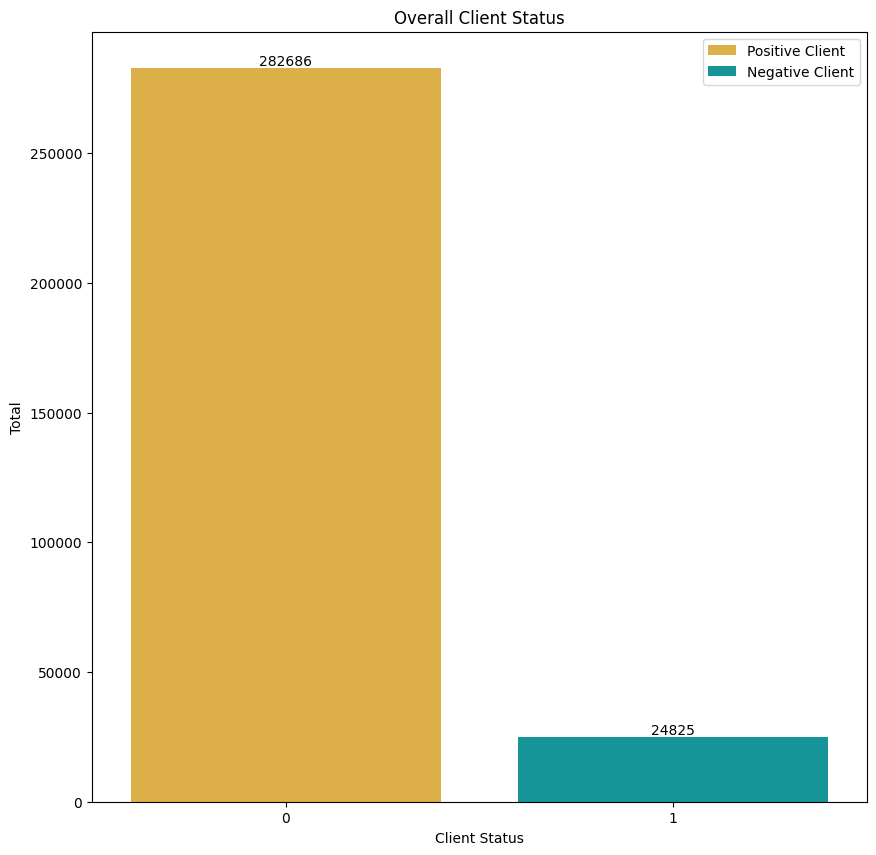

In [ ]:
plt.figure(figsize=(10, 10))

count = app_train['TARGET'].value_counts()
ax = sns.barplot(x=count.index, y=count.values, hue=count.index, palette=['#F4B931', '#01A8AE'], legend=True)

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=10)

ax.set_title('Overall Client Status')
plt.xlabel('Client Status')
plt.ylabel('Total')

handles, labels = ax.get_legend_handles_labels()

plt.legend(handles, ['Positive Client', 'Negative Client'], loc='upper right')

plt.show()


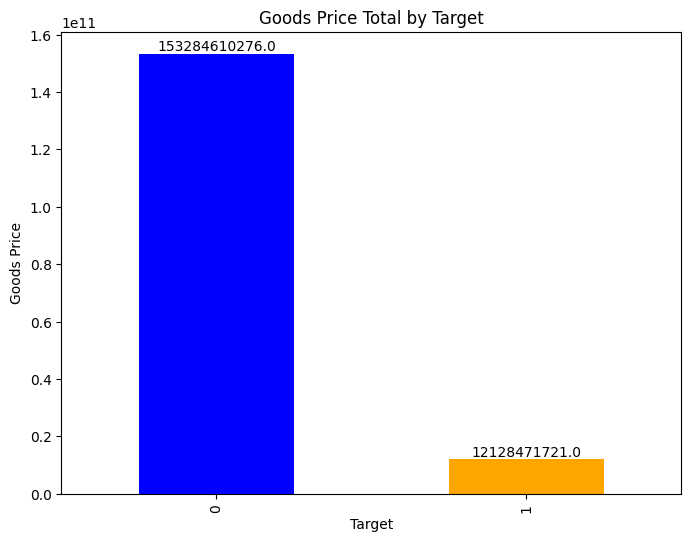

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung total harga berdasarkan nilai target
goods_price = app_train.groupby('TARGET')['AMT_GOODS_PRICE'].sum()

# Membuat bar plot
plt.figure(figsize=(8, 6))
goods_price.plot(kind='bar', color=['blue', 'orange'])

# Menambahkan label sumbu dan judul
plt.title('Goods Price Total by Target')
plt.xlabel('Target')
plt.ylabel('Goods Price')

# Menambahkan label total sum price di atas setiap bar
for i, total in enumerate(goods_price):
    plt.text(i, total + 10, str(total), ha='center', va='bottom')  # Menambahkan teks total

# Menampilkan plot
plt.show()


<Figure size 800x800 with 0 Axes>

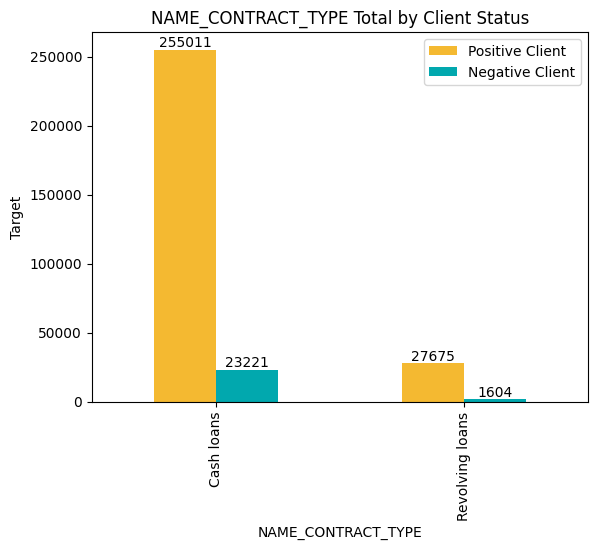

<Figure size 800x800 with 0 Axes>

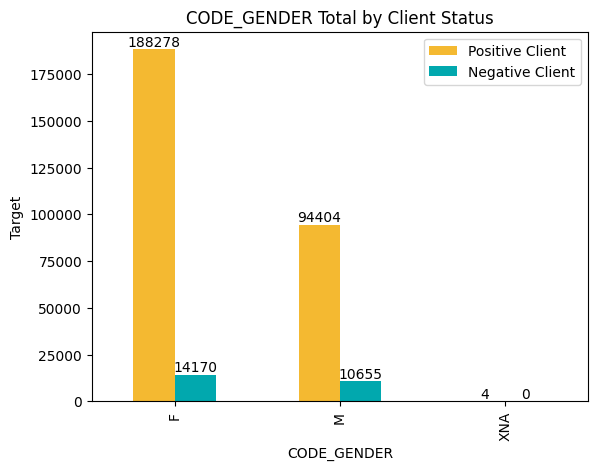

<Figure size 800x800 with 0 Axes>

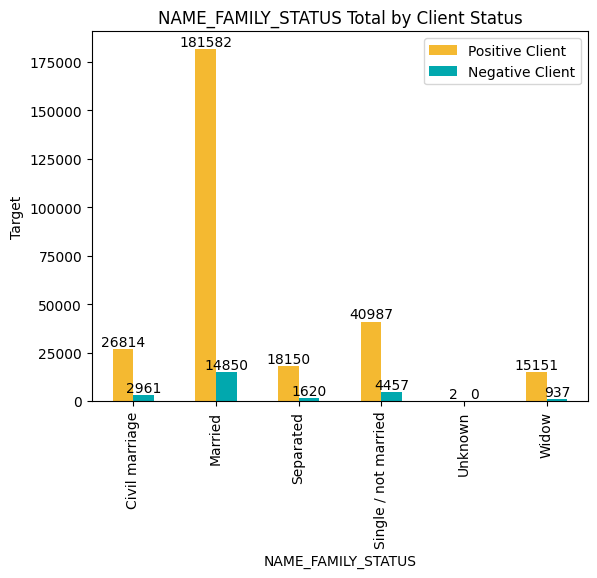

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def distribution (df, columns):
    for column in columns:
        # Menghitung total berdasarkan nilai target
        df_grouped = df.groupby(column)['TARGET'].value_counts().unstack().reset_index()

        # Membuat bar plot
        plt.figure(figsize=(8, 8))
        ax = df_grouped.set_index(column).plot(kind='bar', color=['#F4B931', '#01A8AE'])

        for i, container in enumerate(ax.containers):
            ax.bar_label(container, fontsize=10)

        # Menambahkan label sumbu dan judul
        plt.title(f'{column} Total by Client Status')
        plt.xlabel(column)
        plt.ylabel('Target')

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Positive Client', 'Negative Client'], loc='upper right')

        # Menampilkan plot
        plt.show()
        print()
        print()

# Contoh daftar kolom yang ingin Anda analisis
feature = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS']

# Contoh penggunaan fungsi untuk setiap nama kolom dalam daftar
distribution(app_train, feature)


<Figure size 1500x1500 with 0 Axes>

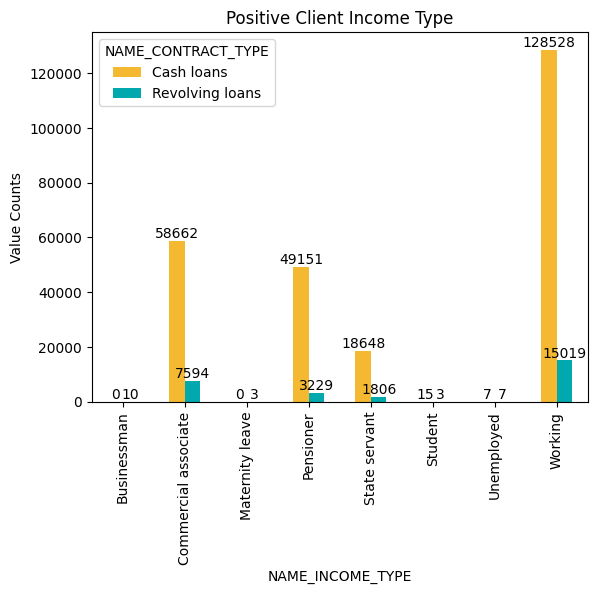

<Figure size 1500x1500 with 0 Axes>

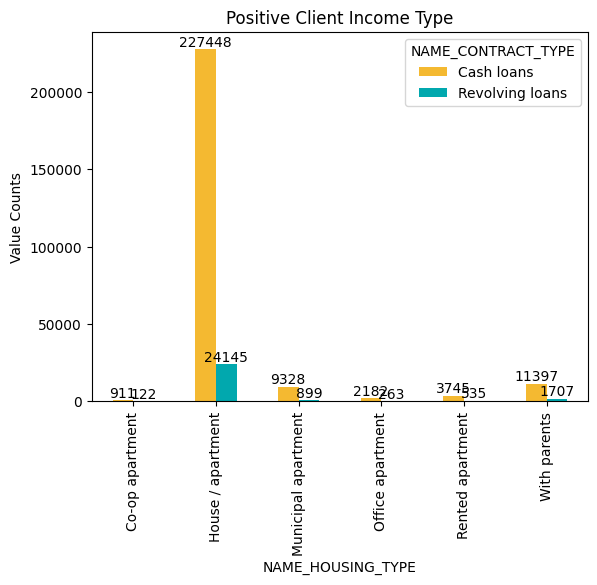

In [85]:
def distribution3(df, column):
    # Filter DataFrame untuk nilai TARGET yang sama dengan 0
    df_filtered = df[df['TARGET'] == 0]

    # Hitung value counts dari kolom yang diberikan pada subset yang difilter
    value_counts = df_filtered.groupby([column])['NAME_CONTRACT_TYPE'].value_counts().unstack().fillna(0)

    # Membuat bar chart
    plt.figure(figsize=(15, 15))
    ax = value_counts.plot(kind='bar', color=['#F4B931', '#01A8AE'])

    for i, container in enumerate(ax.containers):
        ax.bar_label(container, fontsize=10)

    # Menambahkan label sumbu dan judul
    plt.title('Positive Client Income Type')
    plt.xlabel(column)
    plt.ylabel('Value Counts')

    # Menampilkan plot
    plt.show()

# Contoh nama-nama kolom yang ingin Anda visualisasikan
col = ['NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE']

# Contoh penggunaan fungsi untuk setiap nama kolom dalam daftar
for column in col:
    distribution3(app_train, column)


<Figure size 1500x1500 with 0 Axes>

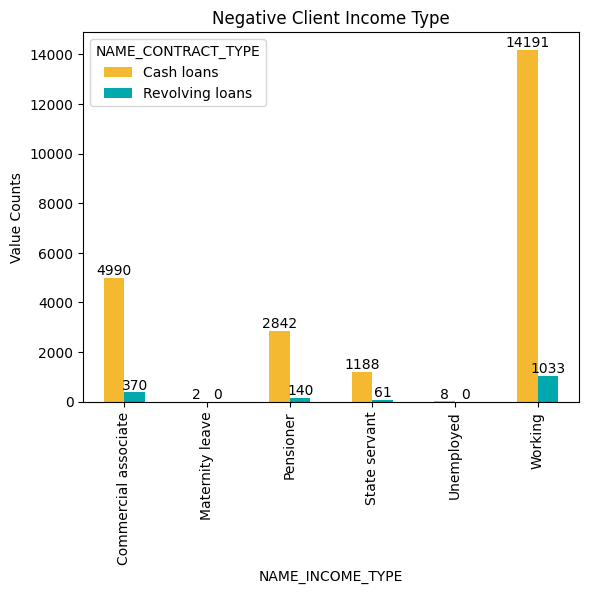

<Figure size 1500x1500 with 0 Axes>

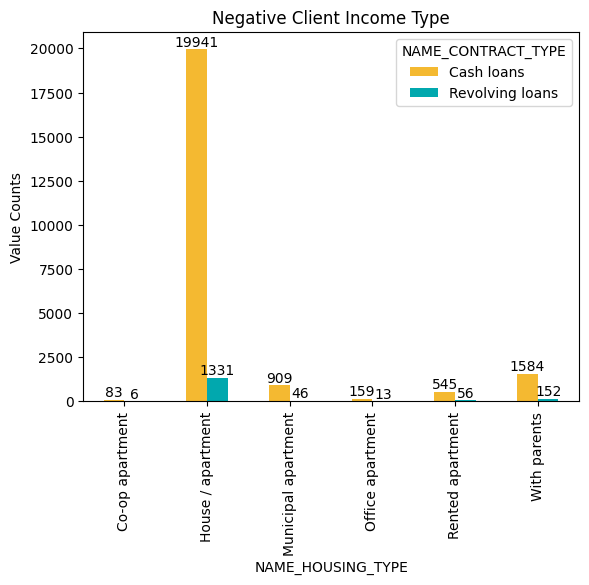

In [84]:
def distribution3(df, column):
    # Filter DataFrame untuk nilai TARGET yang sama dengan 0
    df_filtered = df[df['TARGET'] == 1]

    # Hitung value counts dari kolom yang diberikan pada subset yang difilter
    value_counts = df_filtered.groupby([column])['NAME_CONTRACT_TYPE'].value_counts().unstack().fillna(0)

    # Membuat bar chart
    plt.figure(figsize=(15, 15))
    ax = value_counts.plot(kind='bar', color=['#F4B931', '#01A8AE'])

    for i, container in enumerate(ax.containers):
        ax.bar_label(container, fontsize=10)

    # Menambahkan label sumbu dan judul
    plt.title('Negative Client Income Type')
    plt.xlabel(column)
    plt.ylabel('Value Counts')

    # Menampilkan plot
    plt.show()

# Contoh nama-nama kolom yang ingin Anda visualisasikan
col = ['NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE']

# Contoh penggunaan fungsi untuk setiap nama kolom dalam daftar
for column in col:
    distribution3(app_train, column)


<Figure size 1000x600 with 0 Axes>

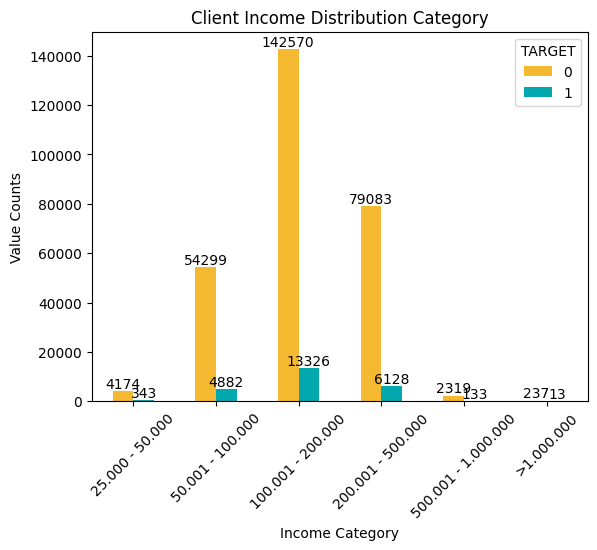

In [95]:
# Membuat kategori berdasarkan rentang penghasilan
bins = [25000, 50000, 100000, 200000, 500000, 1000000, float('inf')]
labels = ['25.000 - 50.000', '50.001 - 100.000', '100.001 - 200.000', '200.001 - 500.000', '500.001 - 1.000.000', '>1.000.000']
app_train['Income Category'] = pd.cut(app_train['AMT_INCOME_TOTAL'], bins=bins, labels=labels)

# Hitung jumlah pengamatan di setiap kategori dengan urutan label yang ditentukan
income_counts = app_train.groupby(['Income Category', 'TARGET']).size().unstack(fill_value=0).sort_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
ax = income_counts.plot(kind='bar', color=['#F4B931', '#01A8AE'])

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=10)

plt.title('Client Income Distribution Category')
plt.xlabel('Income Category')
plt.ylabel('Value Counts')
plt.xticks(rotation=45)
plt.show()

# **Data Cleaning**

## **App_Train**

In [96]:
app_train.duplicated().sum()

0

### **Missing Values**

In [97]:
# Atur display options untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

missing_count = app_train.isna().sum()
percentage_missing = ((missing_count / len(app_train)) * 100).round(2)

print("\nPresentase nilai yang hilang (NaN) di setiap kolom:")
print(percentage_missing)


Presentase nilai yang hilang (NaN) di setiap kolom:
SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
CN

In [98]:
drop_values = percentage_missing[percentage_missing > 30].index.tolist()
app_train.drop(columns=drop_values, inplace=True)

In [99]:
# Buat pengindeksan boolean untuk menemukan baris dengan nilai 'XNA' pada kolom 'Gender'
index_to_drop = app_train[app_train['CODE_GENDER'] == 'XNA'].index

# Gunakan metode drop() untuk menghapus baris-baris yang memiliki nilai 'XNA' pada kolom 'Gender'
app_train.drop(index_to_drop, inplace=True)

# Sekarang 'XNA' telah dihapus dari kolom 'Gender'

In [100]:
numeric_columns = app_train.select_dtypes(include=[np.number]).columns
categorical_columns = app_train.select_dtypes(exclude=[np.number]).columns

app_train[numeric_columns] = app_train[numeric_columns].fillna(app_train[numeric_columns].median())

for col in categorical_columns:
    mode_val = app_train[col].mode()[0]
    app_train[col].fillna(mode_val, inplace=True)

In [101]:
# Atur display options untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

app_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307507 non-null  int64   
 1   TARGET                       307507 non-null  int64   
 2   NAME_CONTRACT_TYPE           307507 non-null  object  
 3   CODE_GENDER                  307507 non-null  object  
 4   FLAG_OWN_CAR                 307507 non-null  object  
 5   FLAG_OWN_REALTY              307507 non-null  object  
 6   CNT_CHILDREN                 307507 non-null  int64   
 7   AMT_INCOME_TOTAL             307507 non-null  float64 
 8   AMT_CREDIT                   307507 non-null  float64 
 9   AMT_ANNUITY                  307507 non-null  float64 
 10  AMT_GOODS_PRICE              307507 non-null  float64 
 11  NAME_TYPE_SUITE              307507 non-null  object  
 12  NAME_INCOME_TYPE             307507 non-null  obj

In [102]:
app_train.select_dtypes(include='object').describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307507      307507       307507          307507   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202922          213308   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           307507           307507                         307507   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            249815           158771                         218389   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START  \
count              307507             307507                     307507   
unique                  6                  6                          7   
top               Married  House / apartment                    TUESDAY   
freq               196429             272865                      53900   

             ORGANIZATION_TYPE  
count                   307507  
unique                      58  
top     Business Entity Type 3  
freq                     67992

### **Feature Selection**

In [103]:
# # irrelevant_features = [
#     'SK_ID_CURR', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
#     'DAYS_ID_PUBLISH', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
#     'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',  'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
#     'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
#     'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
#     'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
#     'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
#     'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
#     'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
# ]

# app_train = app_train.drop(['SK_ID_CURR'], axis=1)


In [104]:
# # Atur display options untuk menampilkan semua baris dan kolom
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# app_train.info()

### **Label Encoding**

In [105]:
obj_cols = app_train.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in obj_cols:
    app_train[col] = label_encoder.fit_transform(app_train[col])

app_train[obj_cols].head()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            1             0                1   
1                   0            0             0                0   
2                   1            1             1                1   
3                   0            0             0                1   
4                   0            1             0                1   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   3   
1                1                 4                    1                   1   
2                6                 7                    4                   3   
3                6                 7                    4                   0   
4                6                 7                    4                   3   

   NAME_HOUSING_TYPE  WEEKDAY_APPR_PROCESS_START  ORGANIZATION_TYPE  
0                  1                           6                  5  
1                  1                           1                 39  
2                  1                           1                 11  
3                  1                           6                  5  
4                  1                           4                 37

In [106]:
# Atur display options untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

app_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307507 non-null  int64   
 1   TARGET                       307507 non-null  int64   
 2   NAME_CONTRACT_TYPE           307507 non-null  int64   
 3   CODE_GENDER                  307507 non-null  int64   
 4   FLAG_OWN_CAR                 307507 non-null  int64   
 5   FLAG_OWN_REALTY              307507 non-null  int64   
 6   CNT_CHILDREN                 307507 non-null  int64   
 7   AMT_INCOME_TOTAL             307507 non-null  float64 
 8   AMT_CREDIT                   307507 non-null  float64 
 9   AMT_ANNUITY                  307507 non-null  float64 
 10  AMT_GOODS_PRICE              307507 non-null  float64 
 11  NAME_TYPE_SUITE              307507 non-null  int64   
 12  NAME_INCOME_TYPE             307507 non-null  int

### **Outliers**

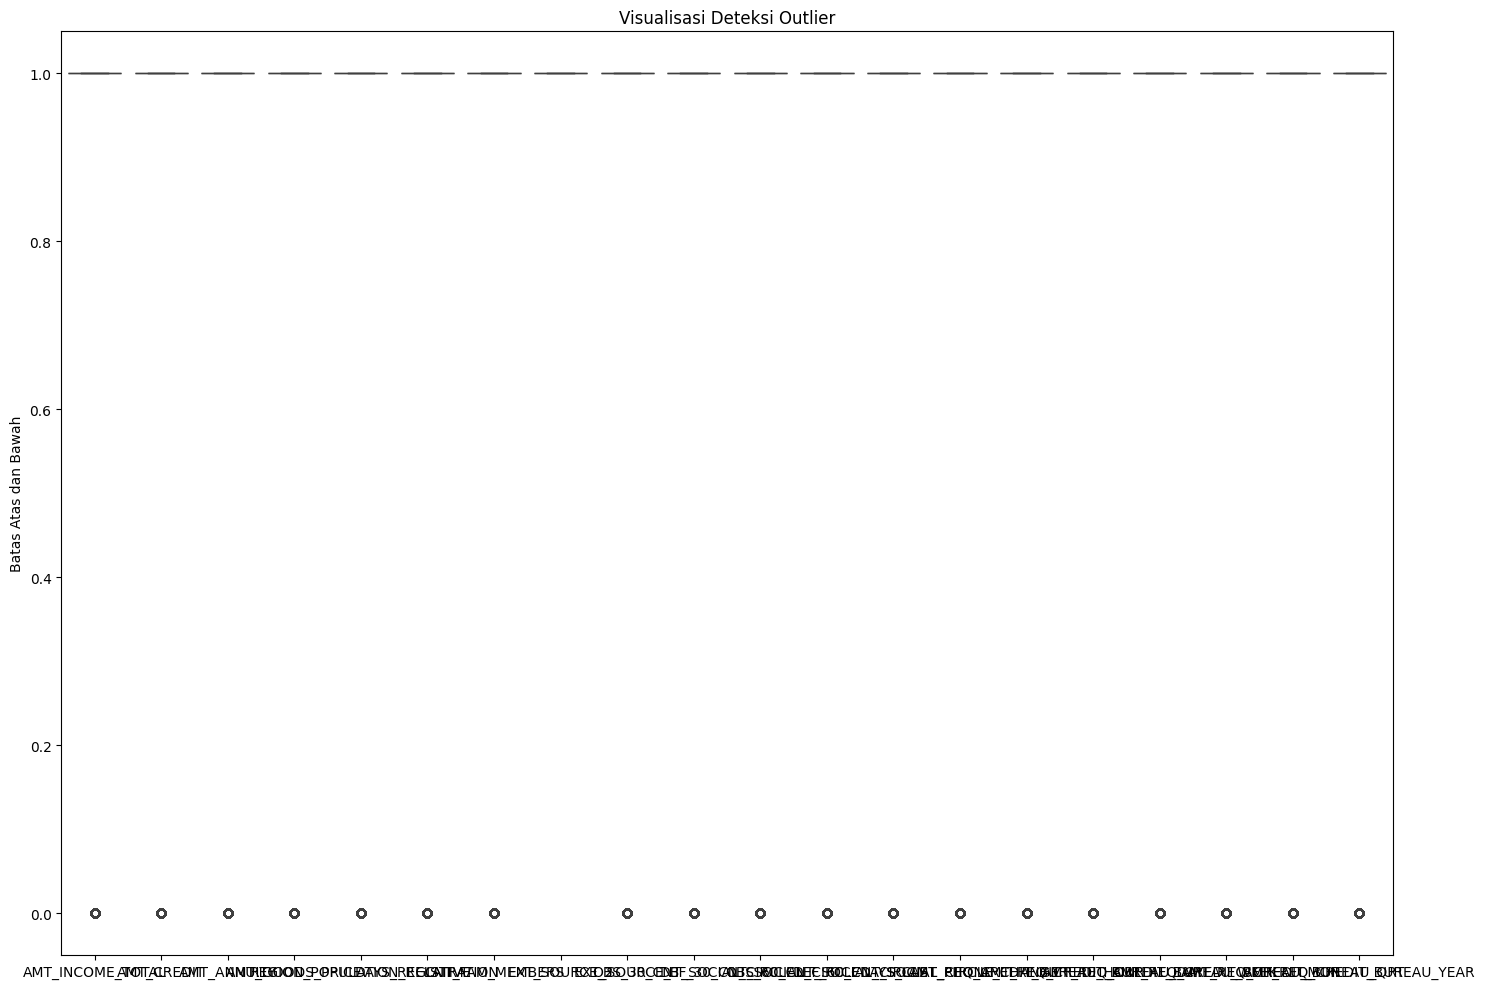

In [107]:
cols = app_train.select_dtypes(float).columns
df_sub = app_train.loc[:, cols]

Q1 = df_sub.quantile(0.25)
Q3 = df_sub.quantile(0.75)
IQR=Q3-Q1

outliers = ~((df_sub < (Q1 - 1.5 * IQR)) | (df_sub > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(15, 10))
sns.boxplot(data=outliers)
plt.title('Visualisasi Deteksi Outlier')
plt.ylabel('Batas Atas dan Bawah')
plt.tight_layout()
plt.show()

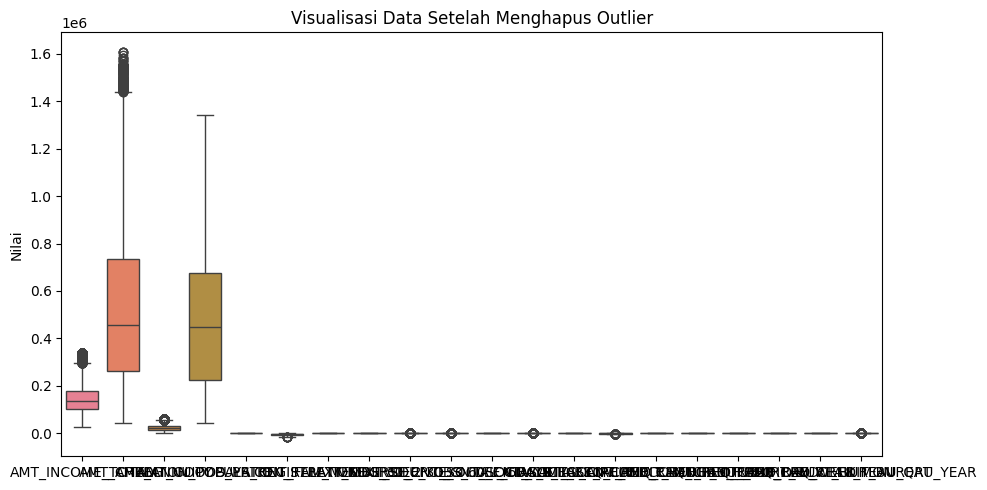

In [108]:
app_train.loc[:, cols] = df_sub.where(outliers, np.nan)
app_train.dropna(subset=cols, inplace=True)

plt.figure(figsize=(10, 5))
sns.boxplot(data=app_train[cols])
plt.title('Visualisasi Data Setelah Menghapus Outlier')
plt.ylabel('Nilai')
plt.tight_layout()
plt.show()

## **App_Test**

In [109]:
app_test.duplicated().sum()

0

### **Missing Values**

In [110]:
# Atur display options untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

missing_count = app_test.isna().sum()
percentage_missing = ((missing_count / len(app_test)) * 100).round(2)

print("\nPresentase nilai yang hilang (NaN) di setiap kolom:")
print(percentage_missing)


Presentase nilai yang hilang (NaN) di setiap kolom:
SK_ID_CURR                       0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.05
AMT_GOODS_PRICE                  0.00
NAME_TYPE_SUITE                  1.87
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     66.29
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.

In [111]:
drop_values = percentage_missing[percentage_missing > 30].index
app_test.drop(columns=drop_values, inplace=True)

In [112]:
numeric_columns = app_test.select_dtypes(include=[np.number]).columns
categorical_columns = app_test.select_dtypes(exclude=[np.number]).columns

app_test[numeric_columns] = app_test[numeric_columns].fillna(app_test[numeric_columns].median())

for col in categorical_columns:
    mode_val = app_test[col].mode()[0]
    app_test[col].fillna(mode_val, inplace=True)

In [113]:
app_test.select_dtypes(include='object').describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count               48744       48744        48744           48744   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq                48305       32678        32311           33658   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count            48744            48744                          48744   
unique               7                7                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq             40638            24533                          33988   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START  \
count               48744              48744                      48744   
unique                  5                  6                          7   
top               Married  House / apartment                    TUESDAY   
freq                32283              43645                       9751   

             ORGANIZATION_TYPE  
count                    48744  
unique                      58  
top     Business Entity Type 3  
freq                     10840

### **Feature Selection**

In [114]:
# # irrelevant_features = [
# #     'SK_ID_CURR', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
# #     'DAYS_ID_PUBLISH', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
# #     'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',  'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
# #     'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
# #     'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
# #     'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
# #     'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
# #     'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
# #     'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
# # ]

# app_test = app_test.drop(['SK_ID_CURR'], axis=1)


In [115]:
# # Atur display options untuk menampilkan semua baris dan kolom
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# app_test.info()

### **Label Encoding**

In [116]:
obj_cols = app_test.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in obj_cols:
    app_test[col] = label_encoder.fit_transform(app_test[col])

app_test[obj_cols].head()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            0             0                1   
1                   0            1             0                1   
2                   0            1             1                1   
3                   0            0             0                1   
4                   0            1             1                0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 6                    1                   1   
1                6                 6                    4                   1   
2                6                 6                    1                   1   
3                6                 6                    4                   1   
4                6                 6                    4                   1   

   NAME_HOUSING_TYPE  WEEKDAY_APPR_PROCESS_START  ORGANIZATION_TYPE  
0                  1                           5                 28  
1                  1                           0                 42  
2                  1                           1                 54  
3                  1                           6                  5  
4                  1                           0                  5

In [117]:
# Atur display options untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  int64  
 2   CODE_GENDER                  48744 non-null  int64  
 3   FLAG_OWN_CAR                 48744 non-null  int64  
 4   FLAG_OWN_REALTY              48744 non-null  int64  
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48744 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_TYPE_SUITE              48744 non-null  int64  
 11  NAME_INCOME_TYPE             48744 non-null  int64  
 12  NAME_EDUCATION_TYPE          48744 non-null  int64  
 13  NAME_FAMILY_STAT

### **Outliers**

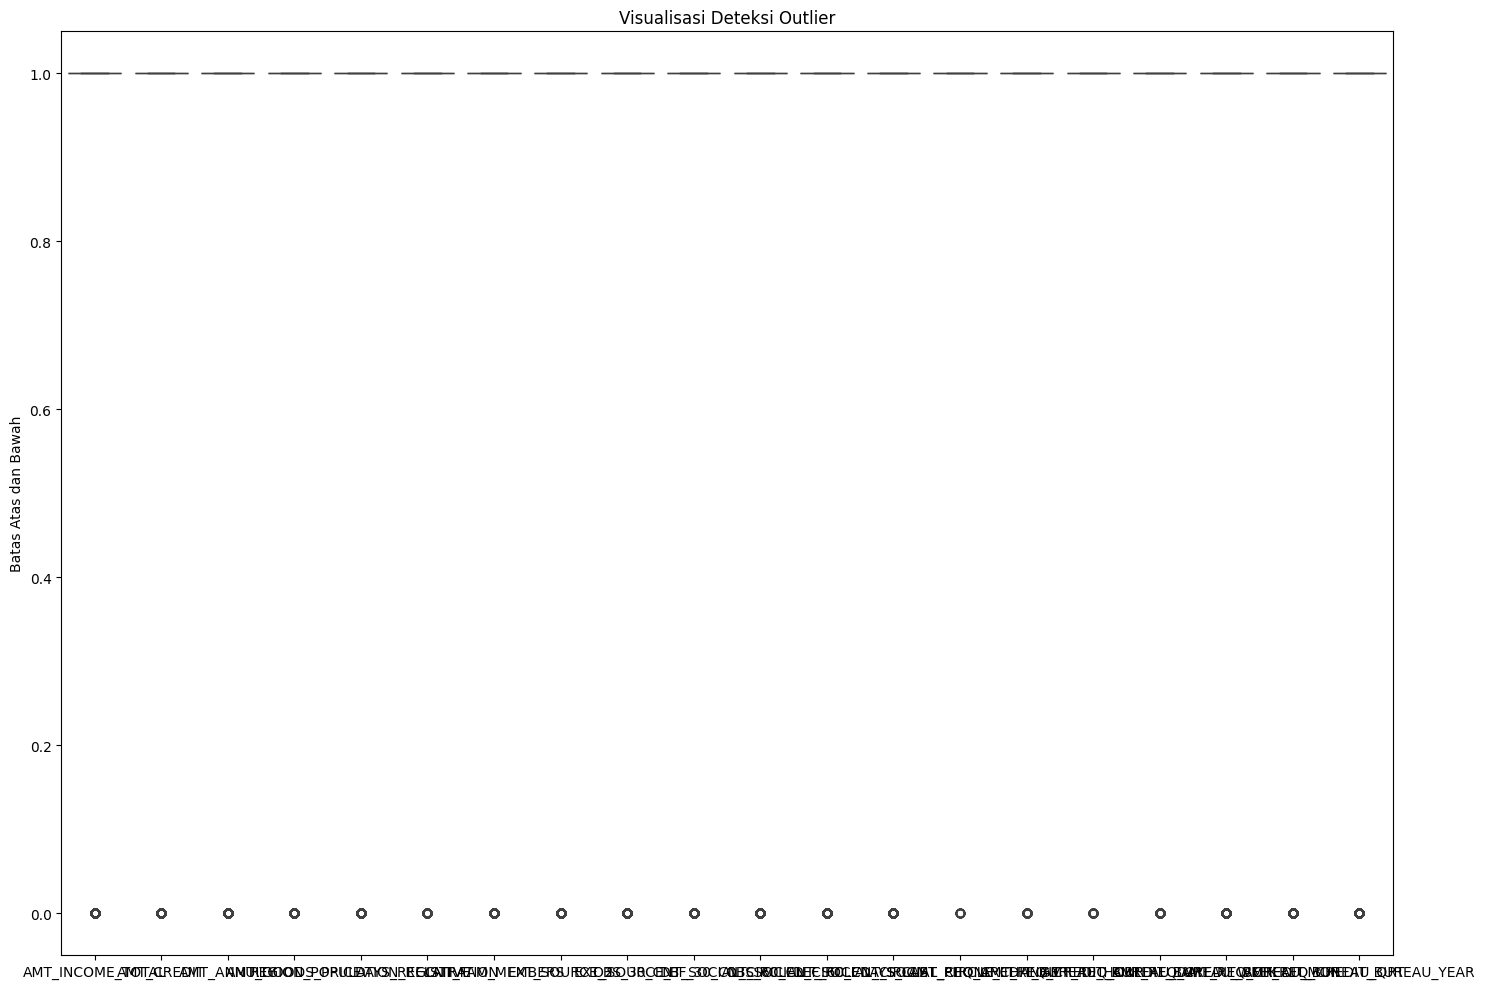

In [118]:
cols = app_test.select_dtypes(float).columns
df_sub = app_test.loc[:, cols]

Q1 = df_sub.quantile(0.25)
Q3 = df_sub.quantile(0.75)
IQR=Q3-Q1

outliers = ~((df_sub < (Q1 - 1.5 * IQR)) | (df_sub > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(15, 10))
sns.boxplot(data=outliers)
plt.title('Visualisasi Deteksi Outlier')
plt.ylabel('Batas Atas dan Bawah')
plt.tight_layout()
plt.show()

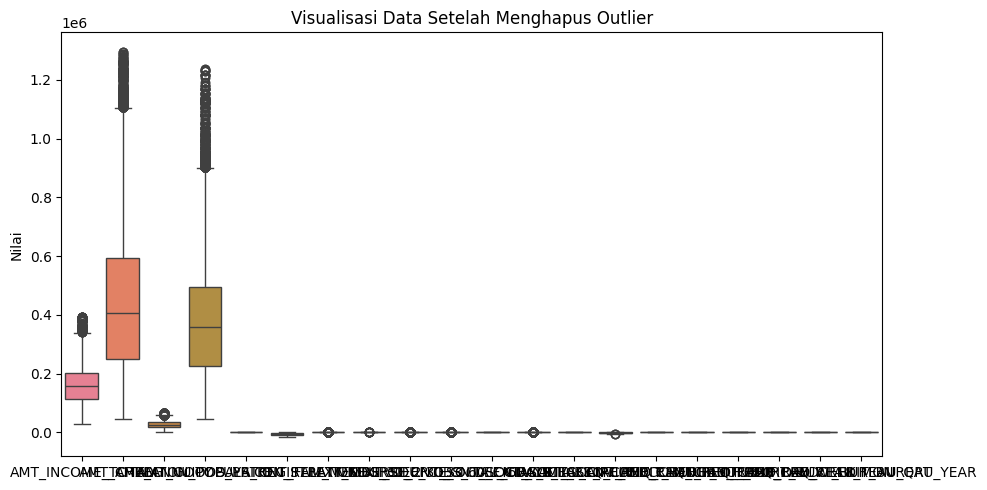

In [119]:
app_test.loc[:, cols] = df_sub.where(outliers, np.nan)
app_test.dropna(subset=cols, inplace=True)

plt.figure(figsize=(10, 5))
sns.boxplot(data=app_test[cols])
plt.title('Visualisasi Data Setelah Menghapus Outlier')
plt.ylabel('Nilai')
plt.tight_layout()
plt.show()

# **Data Understanding**

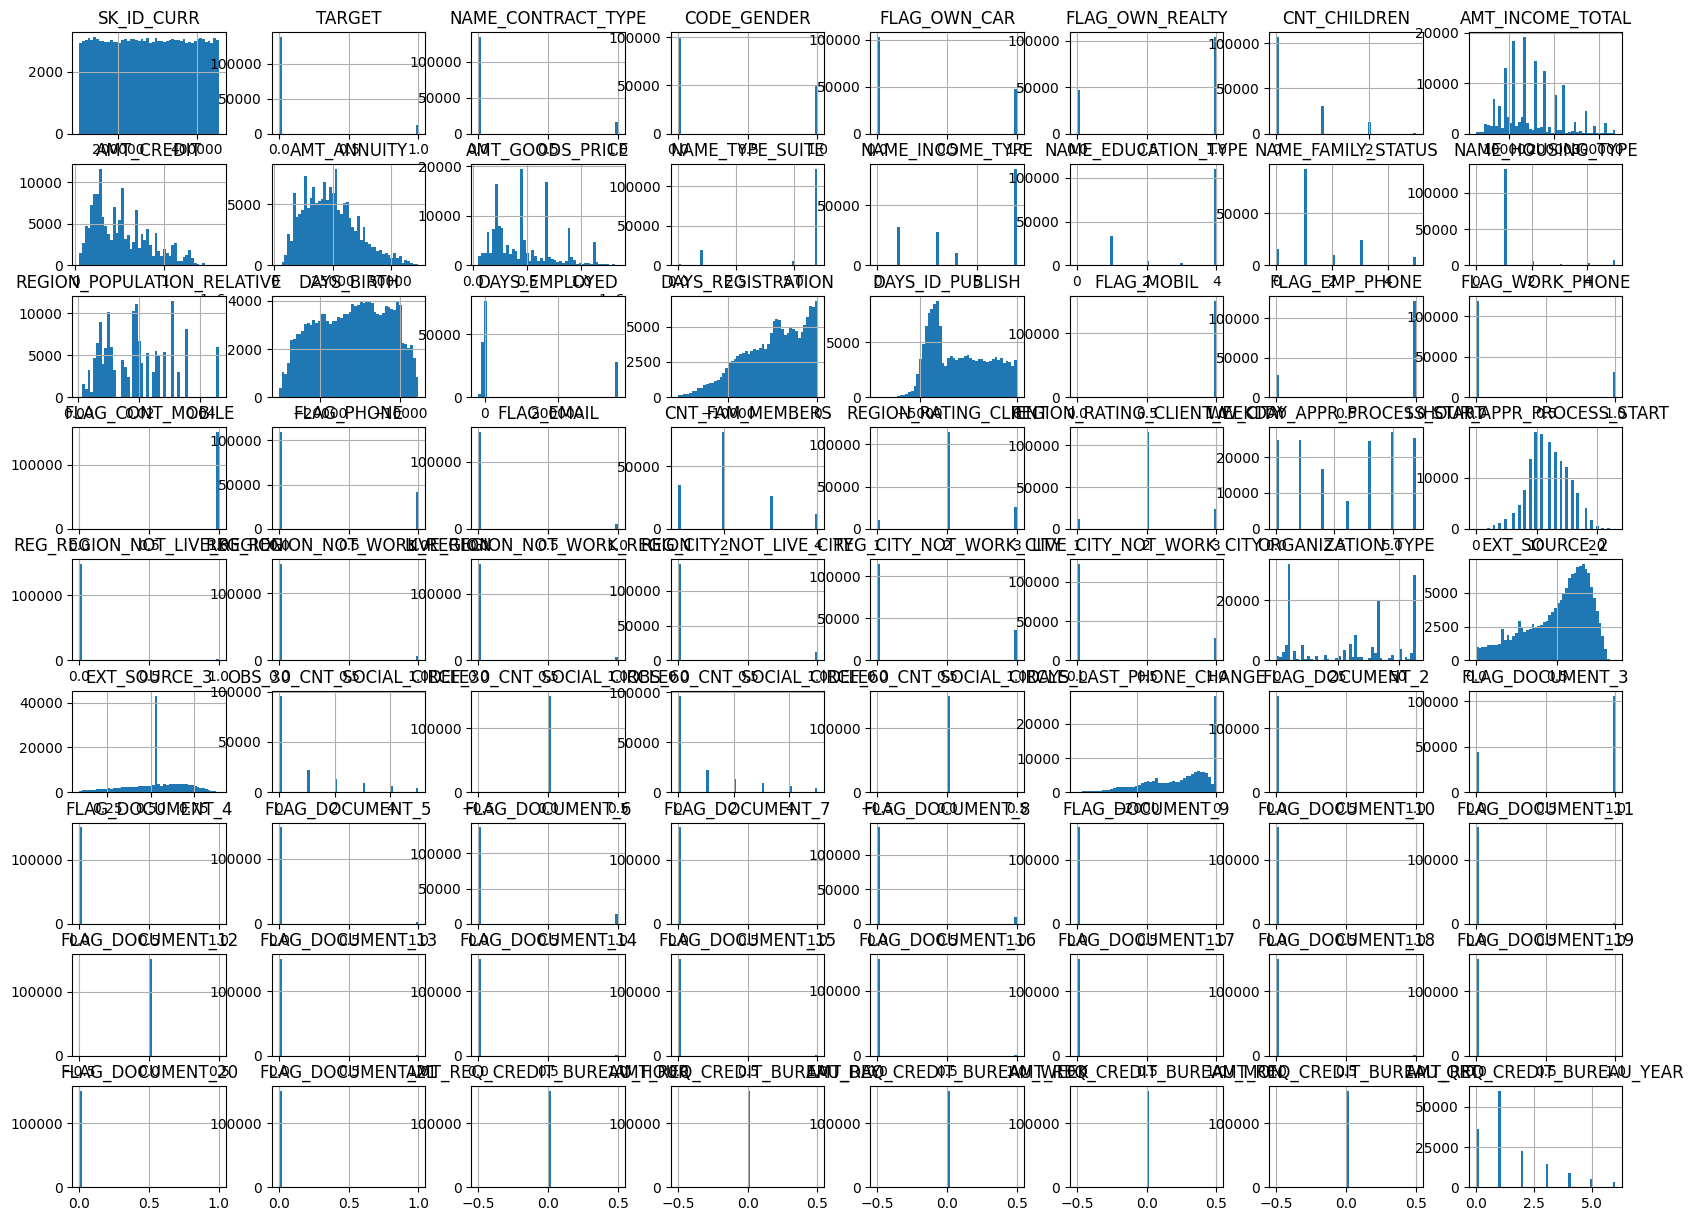

In [120]:
app_train.hist(bins=50, figsize=(20, 15))
plt.show()

In [121]:
app_train.describe()

SK_ID_CURR         TARGET  NAME_CONTRACT_TYPE    CODE_GENDER  \
count  150645.000000  150645.000000       150645.000000  150645.000000   
mean   278107.671121       0.082107            0.108062       0.335438   
std    102900.494221       0.274528            0.310460       0.472145   
min    100003.000000       0.000000            0.000000       0.000000   
25%    188958.000000       0.000000            0.000000       0.000000   
50%    277906.000000       0.000000            0.000000       0.000000   
75%    366989.000000       0.000000            0.000000       1.000000   
max    456254.000000       1.000000            1.000000       1.000000   

        FLAG_OWN_CAR  FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  150645.000000    150645.000000  150645.000000     150645.000000   
mean        0.316705         0.689416       0.380597     146824.762689   
std         0.465193         0.462734       0.645616      61284.095785   
min         0.000000         0.000000       0.000000      25650.000000   
25%         0.000000         0.000000       0.000000     103500.000000   
50%         0.000000         1.000000       0.000000     135000.000000   
75%         1.000000         1.000000       1.000000     180000.000000   
max         1.000000         1.000000       3.000000     337500.000000   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  \
count  1.506450e+05  150645.000000     1.506450e+05    150645.000000   
mean   5.233163e+05   24283.953838     4.664547e+05         5.212705   
std    3.165435e+05   11296.126513     2.821242e+05         1.783385   
min    4.500000e+04    1980.000000     4.500000e+04         0.000000   
25%    2.636865e+05   15426.000000     2.250000e+05         6.000000   
50%    4.578345e+05   23184.000000     4.500000e+05         6.000000   
75%    7.335000e+05   31396.500000     6.750000e+05         6.000000   
max    1.609272e+06   61659.000000     1.341000e+06         6.000000   

       NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
count     150645.000000        150645.000000       150645.000000   
mean           4.788065             3.258807            1.503641   
std            2.506367             1.257699            1.200509   
min            0.000000             0.000000            0.000000   
25%            3.000000             2.000000            1.000000   
50%            7.000000             4.000000            1.000000   
75%            7.000000             4.000000            2.000000   
max            7.000000             4.000000            5.000000   

       NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count       150645.00000               150645.000000  150645.000000   
mean             1.30767                    0.018885  -16004.070318   
std              0.98017                    0.010792    4433.422683   
min              0.00000                    0.000290  -25201.000000   
25%              1.00000                    0.009630  -19694.000000   
50%              1.00000                    0.018634  -15762.000000   
75%              1.00000                    0.026392  -12279.000000   
max              5.00000                    0.046220   -7673.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  \
count  150645.000000      150645.000000    150645.000000  150645.000000   
mean    65828.714820       -4993.415533     -2948.502280       0.999993   
std    142871.743134        3481.307862      1518.926329       0.002576   
min    -17522.000000      -15679.000000     -7197.000000       0.000000   
25%     -2655.000000       -7501.000000     -4277.000000       1.000000   
50%     -1138.000000       -4509.000000     -3186.000000       1.000000   
75%      -257.000000       -2067.000000     -1643.000000       1.000000   
max    365243.000000           0.000000         0.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   150645.000000  

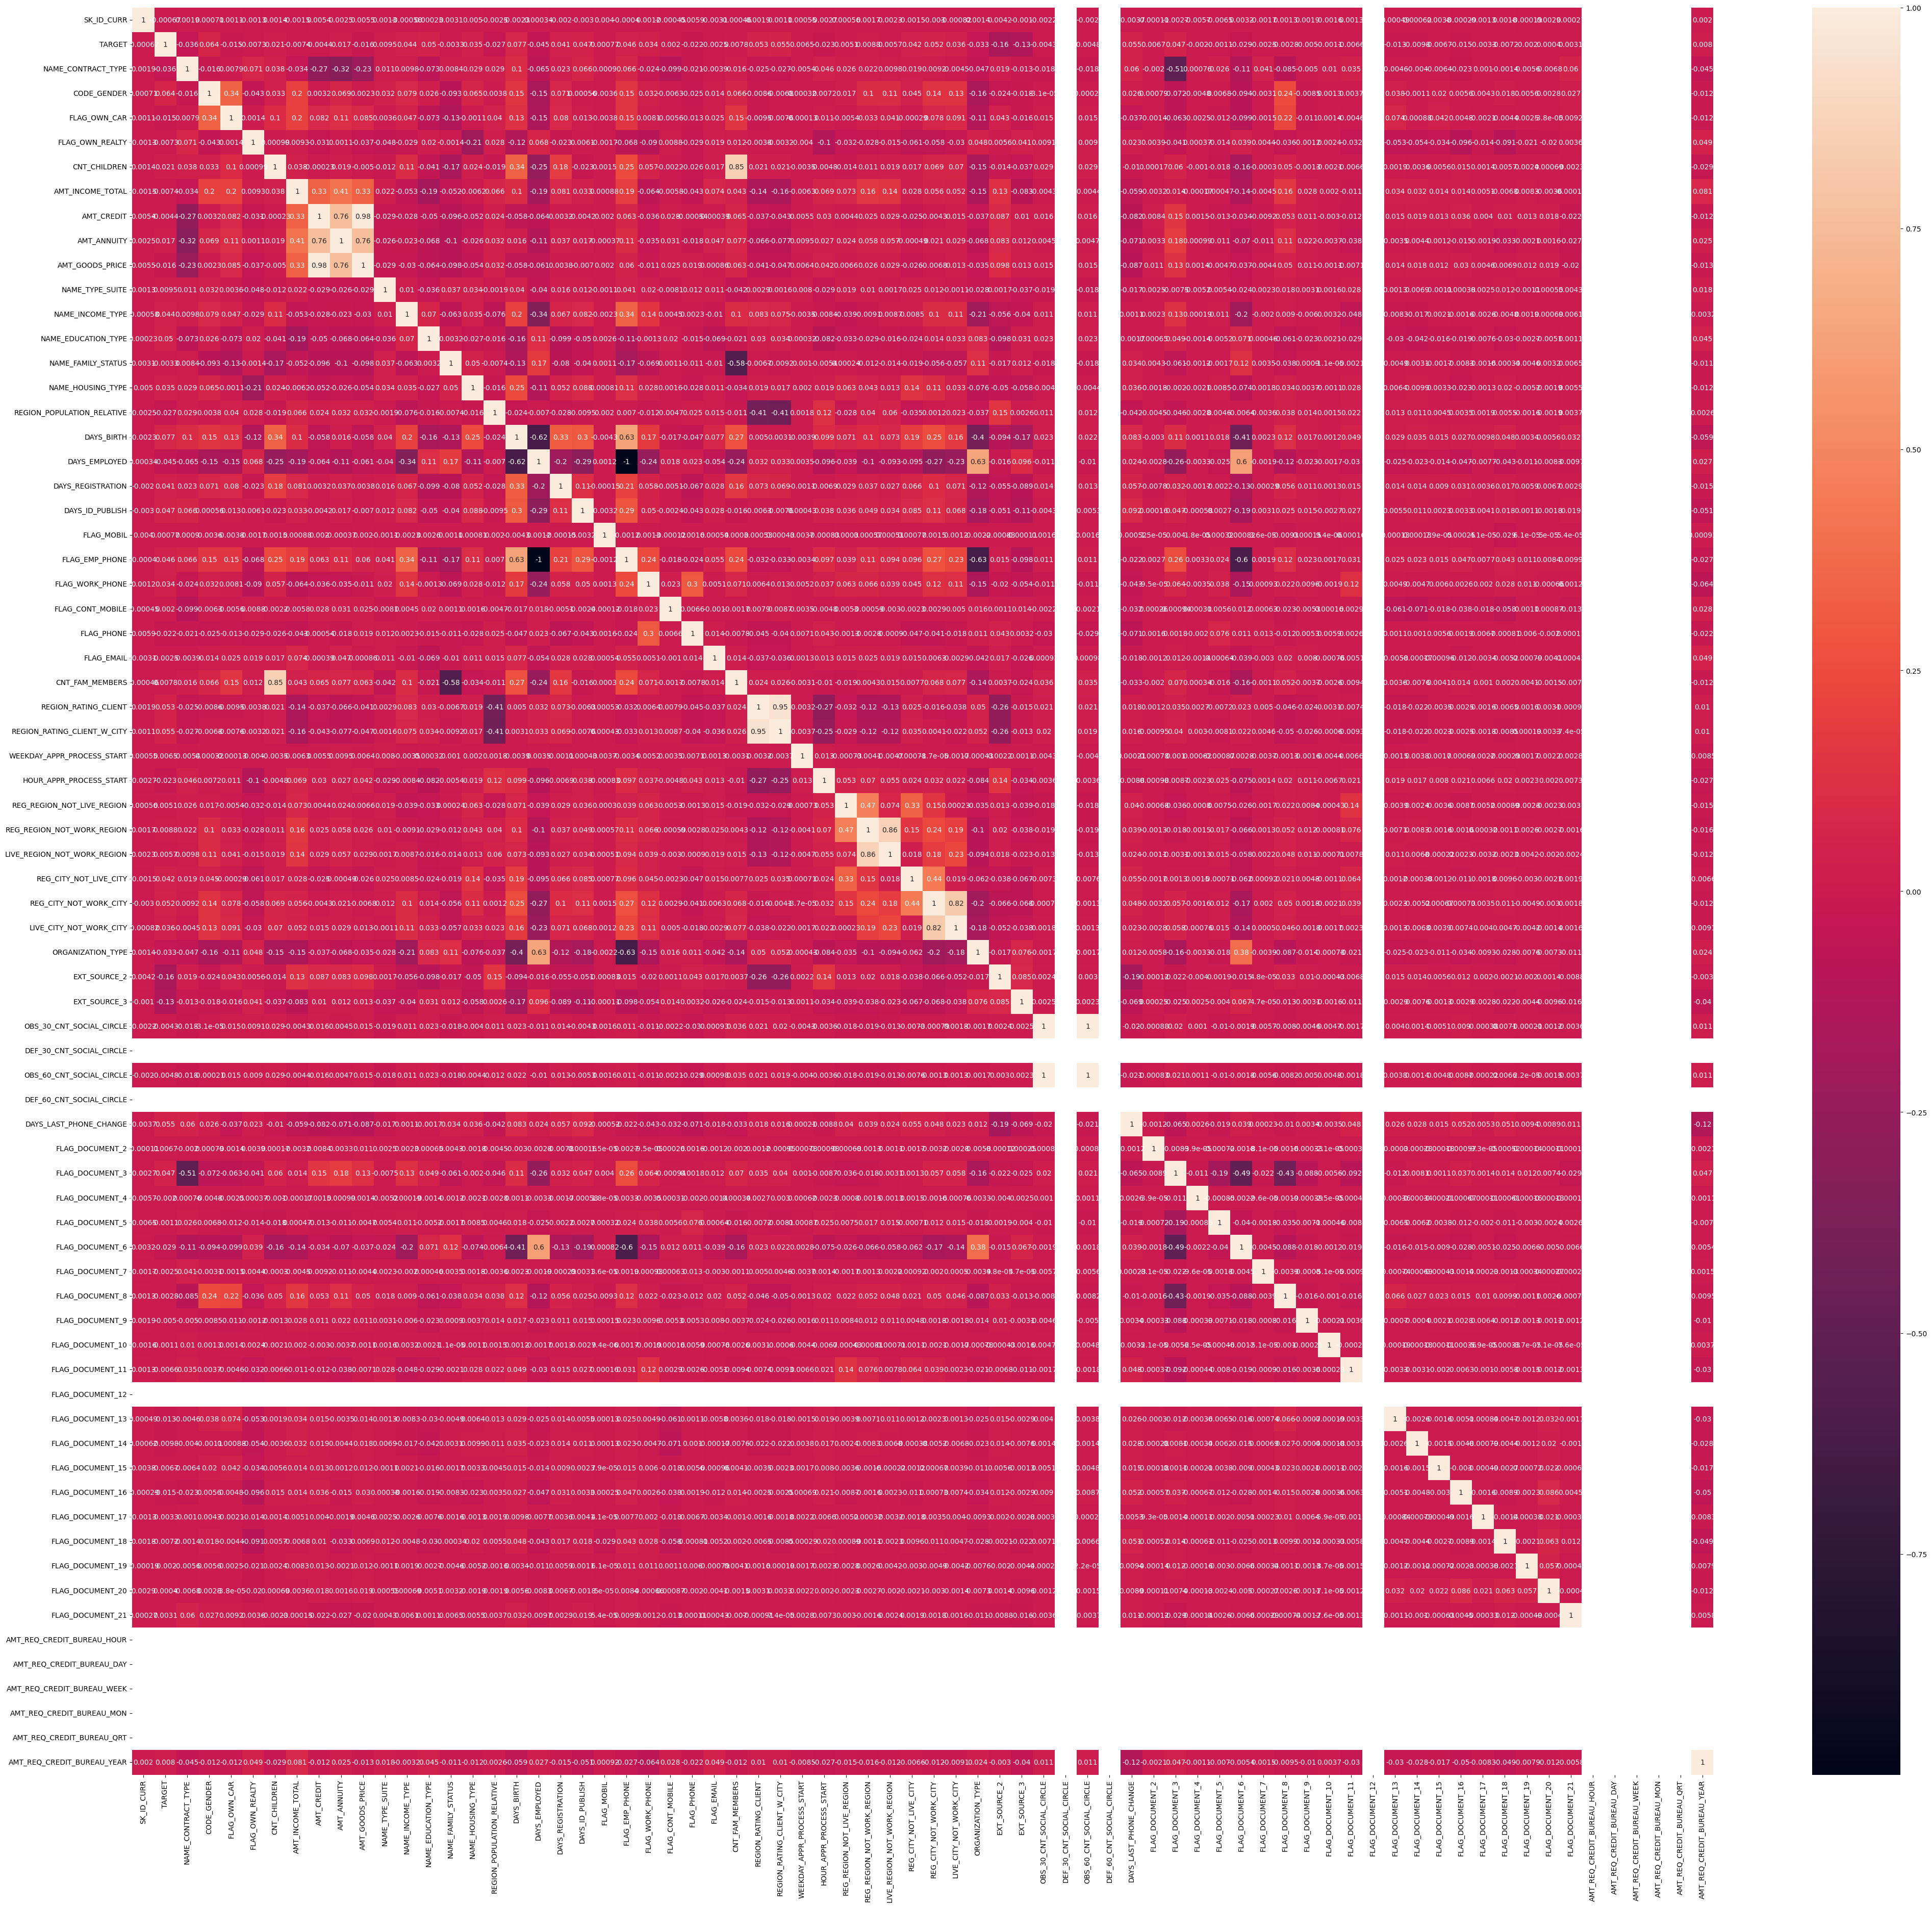

In [124]:
# Membuat matriks korelasi
app_train = app_train.drop(['Income Category'], axis=1)
correlation_matrix = app_train.corr()

# Membuat heatmap
plt.figure(figsize=(50, 45))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [125]:
irrelevant_features = [
    'SK_ID_CURR', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_12', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_QRT'
]

app_train = app_train.drop(irrelevant_features, axis=1)

In [126]:
irrelevant_features = [
    'SK_ID_CURR', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_12', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_QRT'
]

app_test = app_test.drop(irrelevant_features, axis=1)

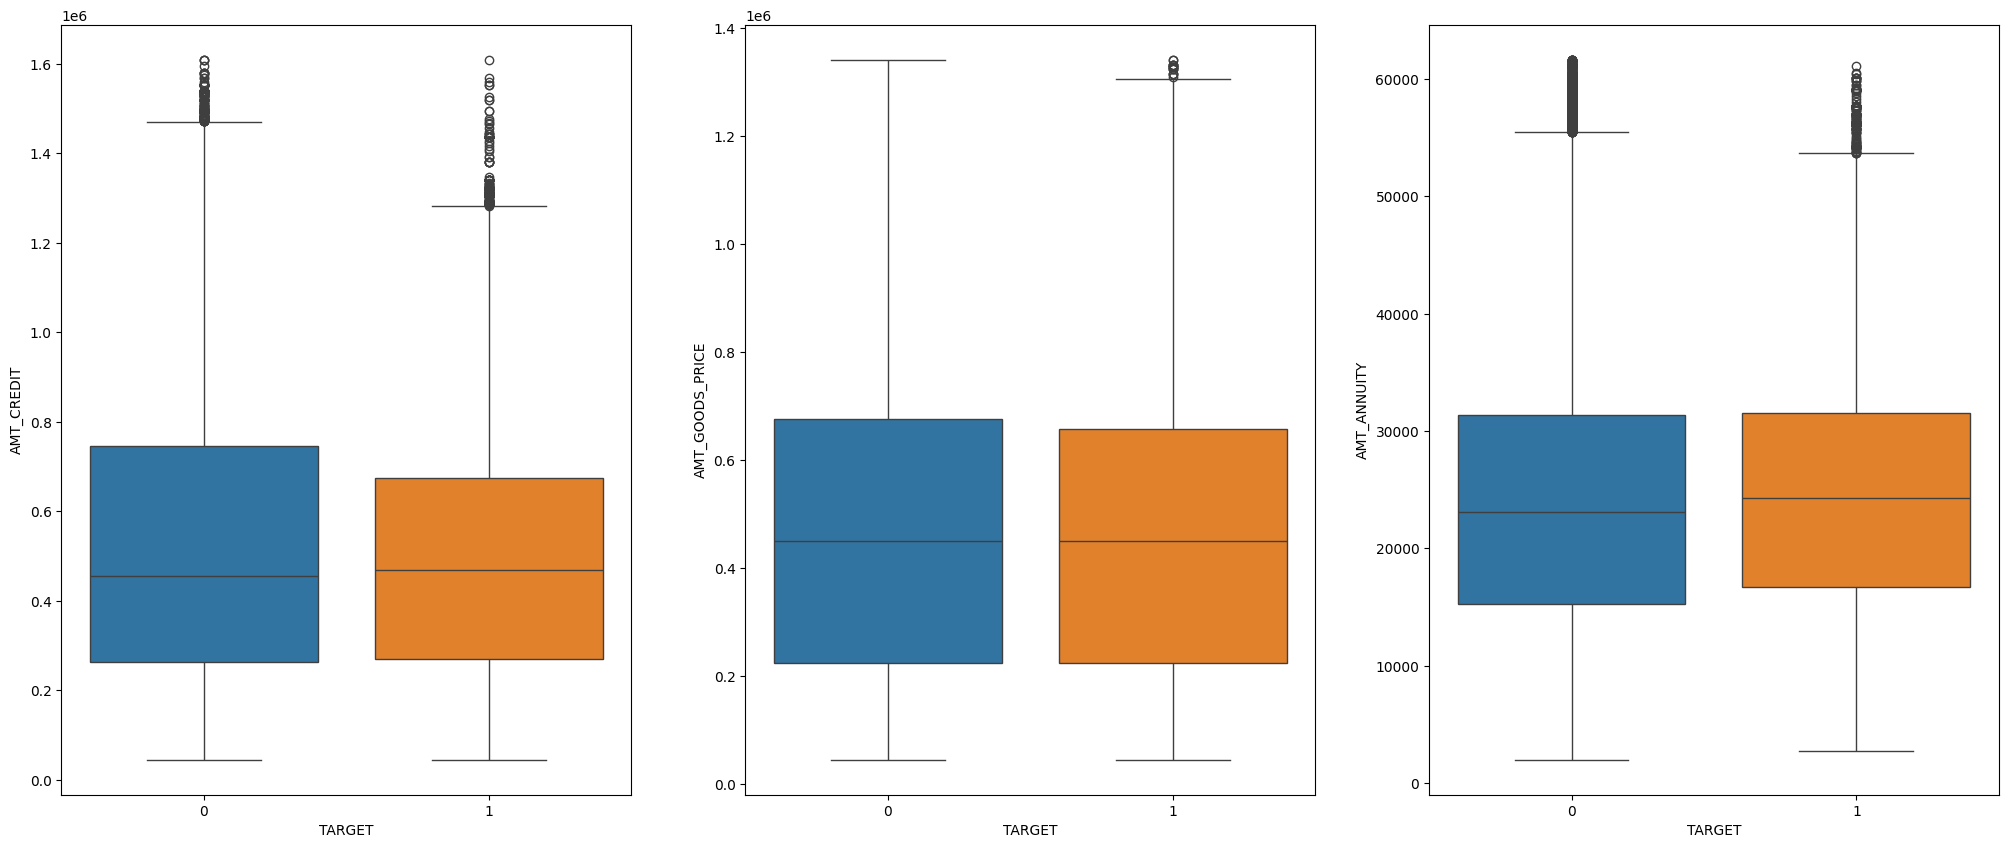

In [127]:
fig, axs = plt.subplots(ncols=3, figsize=(25, 10))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=app_train, ax=axs[0], hue='TARGET', legend=False)
sns.boxplot(x='TARGET', y='AMT_GOODS_PRICE', data=app_train, ax=axs[1], hue='TARGET', legend=False)
sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=app_train, ax=axs[2], hue='TARGET', legend=False)

plt.show()

In [128]:
app_train = app_train.drop(['AMT_GOODS_PRICE'], axis=1)
app_test = app_test.drop(['AMT_GOODS_PRICE'], axis=1)

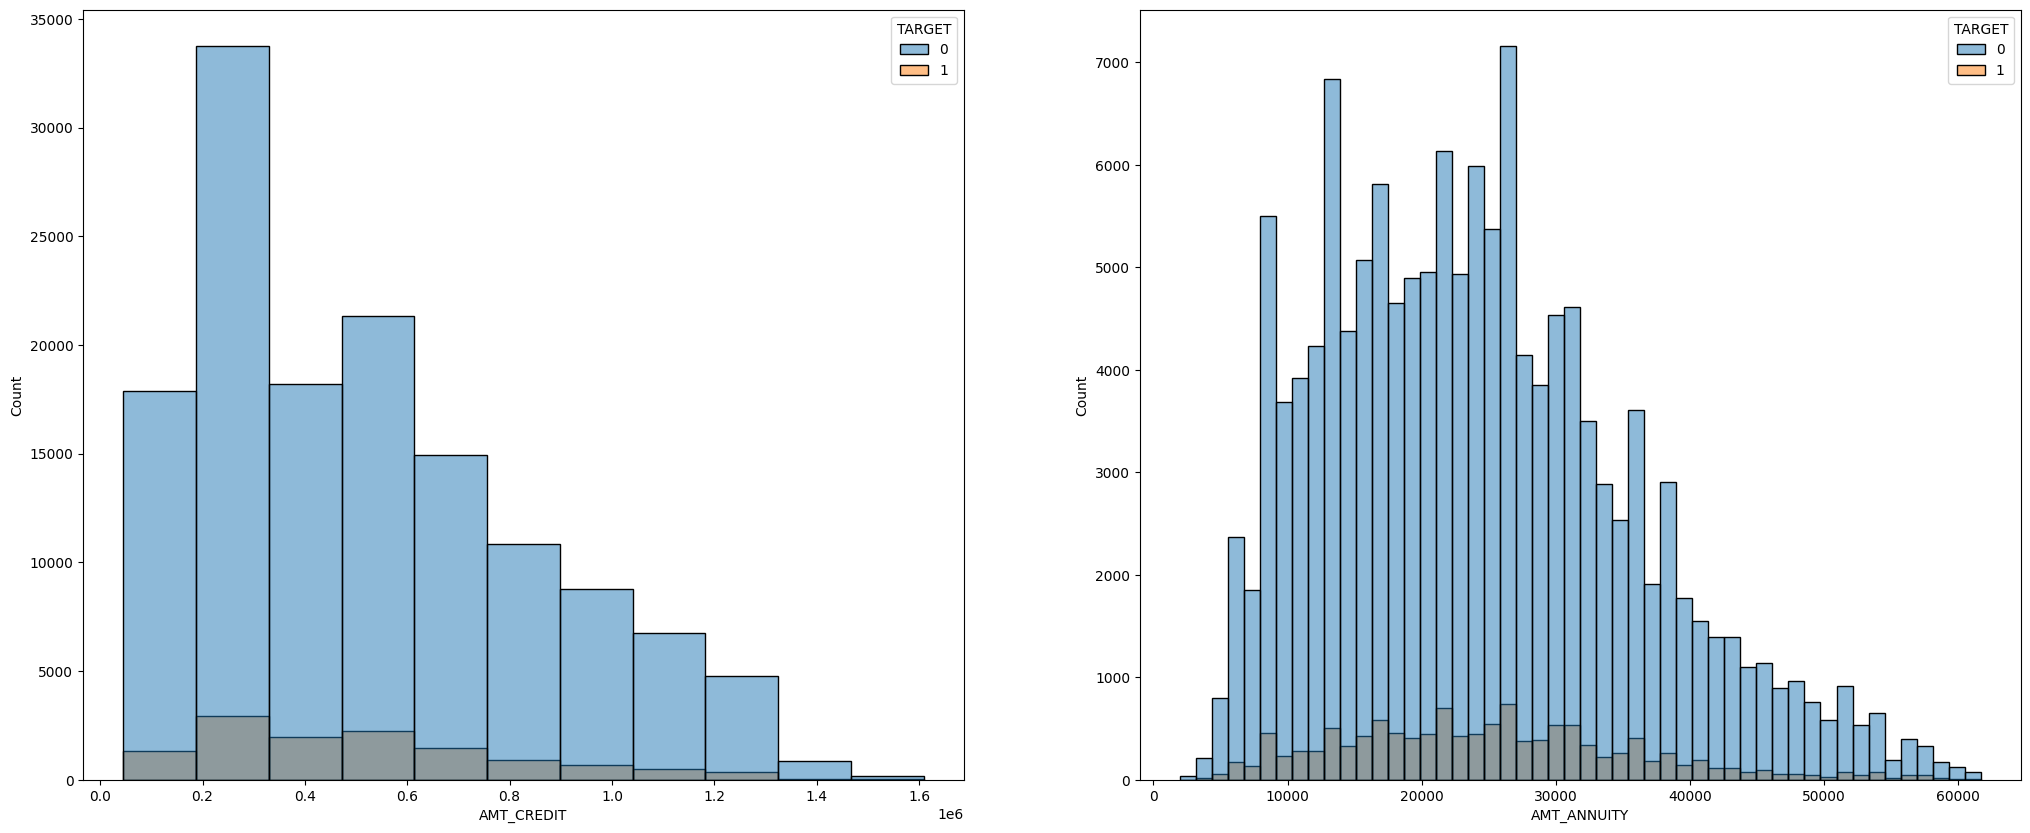

In [129]:
fig, axs = plt.subplots(ncols=2, figsize=(25, 10))
sns.histplot(data=app_train, x="AMT_CREDIT", hue="TARGET", bins=11, ax=axs[0])
sns.histplot(data=app_train, x="AMT_ANNUITY", hue="TARGET", bins=50, ax=axs[1])

plt.show()

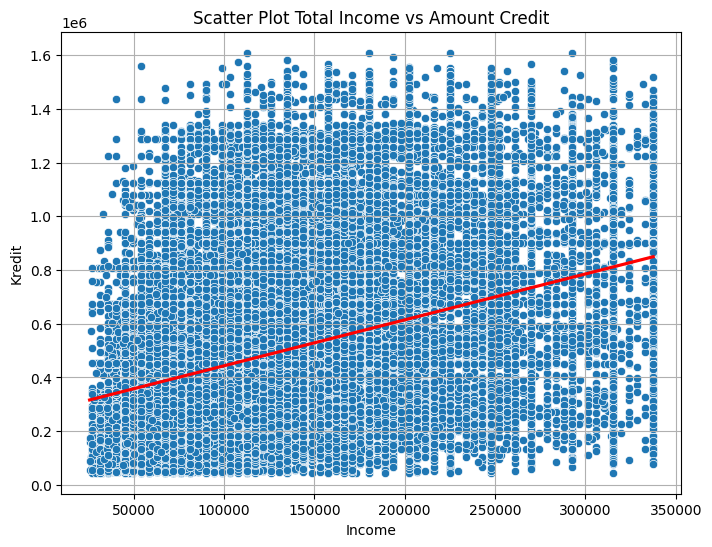

In [130]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=app_train, x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

# Menambahkan garis regresi linear
sns.regplot(data=app_train, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', scatter=False, color='red')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot Total Income vs Amount Credit')
plt.xlabel('Income')
plt.ylabel('Kredit')

# Menampilkan plot
plt.grid(True)
plt.show()

# **Data Modeling**

## **Split Data**

In [131]:
train, test = train_test_split(app_train, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)
print("----------")

X_train, y_train = train.drop('TARGET', axis=1), train.TARGET
X_test, y_test = test.drop('TARGET', axis=1), test.TARGET
print(X_train.shape)
print(y_train.shape)

(120516, 63)
(30129, 63)
----------
(120516, 62)
(120516,)


## **Data Balancing**

In [132]:
!pip install imbalanced-learn

In [133]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

## **Modeling**

In [134]:
# Buat objek untuk setiap algoritma
logistic_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gbm_model = GradientBoostingClassifier()
catboost = CatBoostClassifier()
naive_bayes_model = GaussianNB()
lgbm_model = LGBMClassifier()

# Latih masing-masing model
logistic_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
xgb.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)
catboost.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Lakukan prediksi dengan masing-masing model
y_pred_logistic_reg = logistic_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)
y_pred_catboost = catboost.predict(X_test)
naive_bayes_predictions = naive_bayes_model.predict(X_test)
lgbm_predictions = lgbm_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.103329
0:	learn: 0.6252999	total: 126ms	remaining: 2m 5s
1:	learn: 0.5664726	total: 192ms	remaining: 1m 35s
2:	learn: 0.5327557	total: 256ms	remaining: 1m 25s
3:	learn: 0.4866411	total: 321ms	remaining: 1m 19s
4:	learn: 0.4726102	total: 397ms	remaining: 1m 18s
5:	learn: 0.4258202	total: 462ms	remaining: 1m 16s
6:	learn: 0.4156394	total: 521ms	remaining: 1m 13s
7:	learn: 0.3828155	total: 582ms	remaining: 1m 12s
8:	learn: 0.3595426	total: 651ms	remaining: 1m 11s
9:	learn: 0.3528498	total: 715ms	remaining: 1m 10s
10:	learn: 0.3457691	total: 776ms	remaining: 1m 9s
11:	learn: 0.3280787	total: 839ms	remaining: 1m 9s
12:	learn: 0.3231813	total: 897ms	remaining: 1m 8s
13:	learn: 0.3173684	total: 958ms	remaining: 1m 7s
14:	learn: 0.3132697	total: 1.02s	remaining: 1m 6s
15:	learn: 0.3083455	total: 1.08s	remaining: 1m 6s
16:	learn: 0.3052714	total: 1.14s	remaining: 1m 6s
17:	learn: 0.2985835	total: 1.2s	remaining: 1m 5s
18:	learn: 0.2916019	total: 1.25s	remaining: 1m 4s
19:

## **Model Evaluation**

In [135]:
# Evaluasi kinerja masing-masing model
accuracy_logistic_reg = accuracy_score(y_test, y_pred_logistic_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
gbm_accuracy = accuracy_score(y_test, gbm_predictions)
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)

# Tampilkan hasil evaluasi
print("Logistic Regression Accuracy:", accuracy_logistic_reg)
print("Decision Tree Accuracy:", accuracy_decision_tree)
print("Random Forest Accuracy:", accuracy_random_forest)
print("KNN Accuracy:", accuracy_knn)
print("XGBoost Accuracy:", accuracy_xgb)
print("CatBoost Accuracy:", accuracy_catboost)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)
print("GBM Accuracy:", gbm_accuracy)
print("LGBM Accuracy:", lgbm_accuracy)

Logistic Regression Accuracy: 0.6008496797105779
Decision Tree Accuracy: 0.8178499120448737
Random Forest Accuracy: 0.9055063228119088
KNN Accuracy: 0.6785157157555843
XGBoost Accuracy: 0.9135052607122706
CatBoost Accuracy: 0.9157290318297985
Naive Bayes Accuracy: 0.4619469613993163
GBM Accuracy: 0.9089249560224368
LGBM Accuracy: 0.9151316007832985


In [136]:
# Inisialisasi model Regresi Logistik
logistic_model = LogisticRegression()

# Definisikan grid hyperparameter
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5)

# Lakukan pencarian hyperparameter
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Dapatkan model terbaik
best_logistic_model = grid_search.best_estimator_

# Melatih model Regresi Logistik dengan parameter terbaik
best_logistic_model.fit(X_train, y_train)

# Prediksi menggunakan model Regresi Logistik terbaik
y_pred = best_logistic_model.predict(X_test)

# Evaluasi kinerja model menggunakan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Parameter terbaik: {'C': 0.01, 'penalty': 'l2'}
Akurasi: 0.6012811576886057


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix dan classification report untuk Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic_reg))
print("-"*20)

# Confusion matrix dan classification report untuk Decision Tree
print("Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))
print("-"*20)

# Confusion matrix dan classification report untuk Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_random_forest))
print("-"*20)

# Confusion matrix dan classification report untuk KNN
print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("-"*20)

# Confusion matrix dan classification report untuk XGBoost
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("-"*20)

# Confusion matrix dan classification report untuk Gradient Boosting Machine (GBM)
print("Gradient Boosting Machine (GBM):")
print(classification_report(y_test, gbm_predictions))
print("-"*20)

# Confusion matrix dan classification report untuk CatBoost
print("CatBoost:")
print(classification_report(y_test, y_pred_catboost))
print("-"*20)

# Confusion matrix dan classification report untuk Naive Bayes
print("Naive Bayes:")
print(classification_report(y_test, naive_bayes_predictions))
print("-"*20)

# Confusion matrix dan classification report untuk LightGBM
print("LightGBM:")
print(classification_report(y_test, lgbm_predictions))
print("-"*20)


Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.61      0.74     27638
           1       0.11      0.52      0.18      2491

    accuracy                           0.60     30129
   macro avg       0.52      0.56      0.46     30129
weighted avg       0.87      0.60      0.69     30129

--------------------
Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90     27638
           1       0.12      0.19      0.15      2491

    accuracy                           0.82     30129
   macro avg       0.52      0.53      0.52     30129
weighted avg       0.86      0.82      0.84     30129

--------------------
Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27638
           1       0.18      0.04      0.06      2491

    accuracy                           0.91     30129
   macro avg       0.55      0.51  

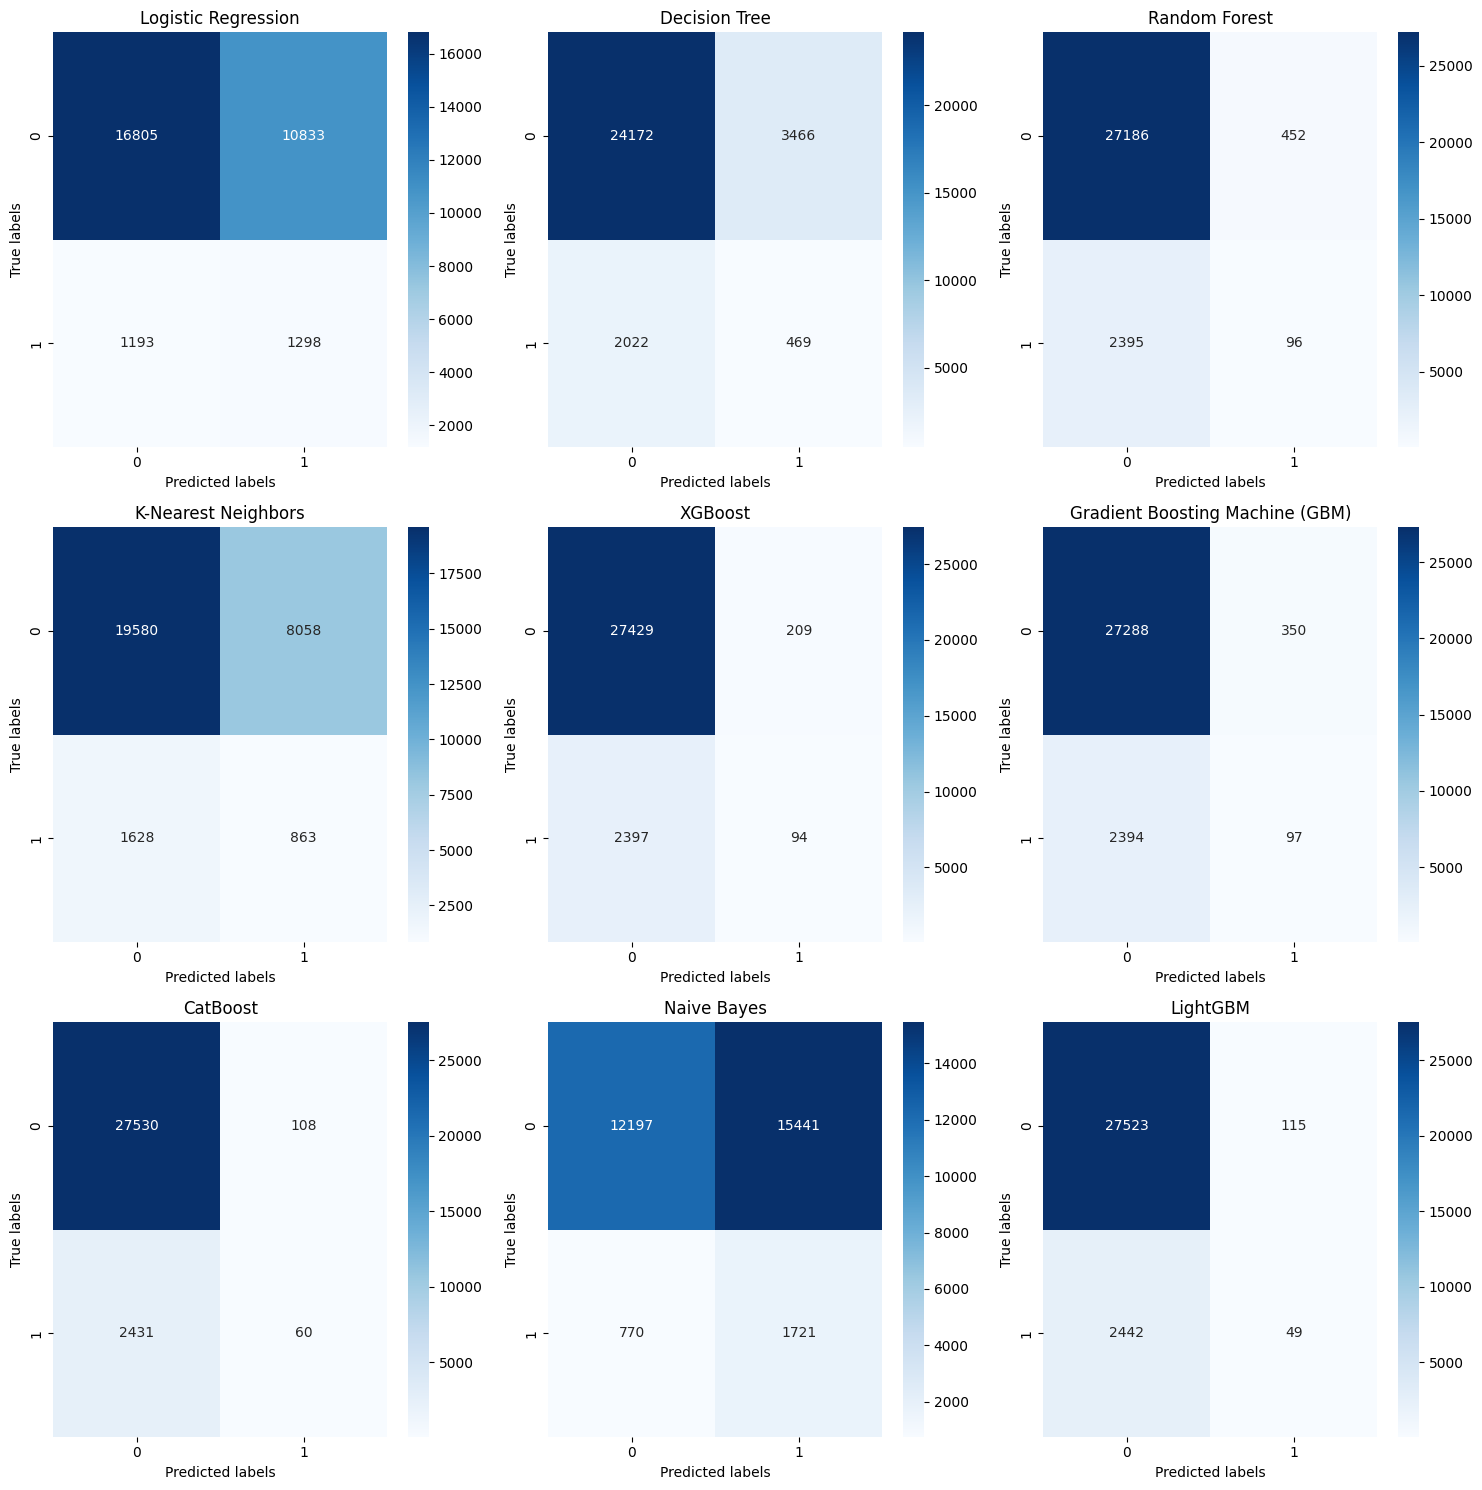

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk memvisualisasikan confusion matrix
def plot_confusion_matrix(ax, algorithm_name, cm):
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(algorithm_name)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

# Matriks untuk menyimpan confusion matrix
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Confusion matrix untuk Logistic Regression
cm = confusion_matrix(y_test, y_pred_logistic_reg)
plot_confusion_matrix(axes[0, 0], 'Logistic Regression', cm)

# Confusion matrix untuk Decision Tree
cm = confusion_matrix(y_test, y_pred_decision_tree)
plot_confusion_matrix(axes[0, 1], 'Decision Tree', cm)

# Confusion matrix untuk Random Forest
cm = confusion_matrix(y_test, y_pred_random_forest)
plot_confusion_matrix(axes[0, 2], 'Random Forest', cm)

# Confusion matrix untuk KNN
cm = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(axes[1, 0], 'K-Nearest Neighbors', cm)

# Confusion matrix untuk XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)
plot_confusion_matrix(axes[1, 1], 'XGBoost', cm)

# Confusion matrix untuk Gradient Boosting Machine (GBM)
cm = confusion_matrix(y_test, gbm_predictions)
plot_confusion_matrix(axes[1, 2], 'Gradient Boosting Machine (GBM)', cm)

# Confusion matrix untuk CatBoost
cm = confusion_matrix(y_test, y_pred_catboost)
plot_confusion_matrix(axes[2, 0], 'CatBoost', cm)

# Confusion matrix untuk Naive Bayes
cm = confusion_matrix(y_test, naive_bayes_predictions)
plot_confusion_matrix(axes[2, 1], 'Naive Bayes', cm)

# Confusion matrix untuk LightGBM
cm = confusion_matrix(y_test, lgbm_predictions)
plot_confusion_matrix(axes[2, 2], 'LightGBM', cm)

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()


# **Model Implementation (Testing)**

In [139]:
X_test_new = app_test

# Gunakan model CatBoost yang telah dilatih sebelumnya untuk melakukan prediksi
y_pred_new = lgbm_model.predict(X_test_new)

# Tambahkan hasil prediksi sebagai kolom baru ke dalam dataset baru
app_test['PREDICTED_TARGET'] = y_pred_new

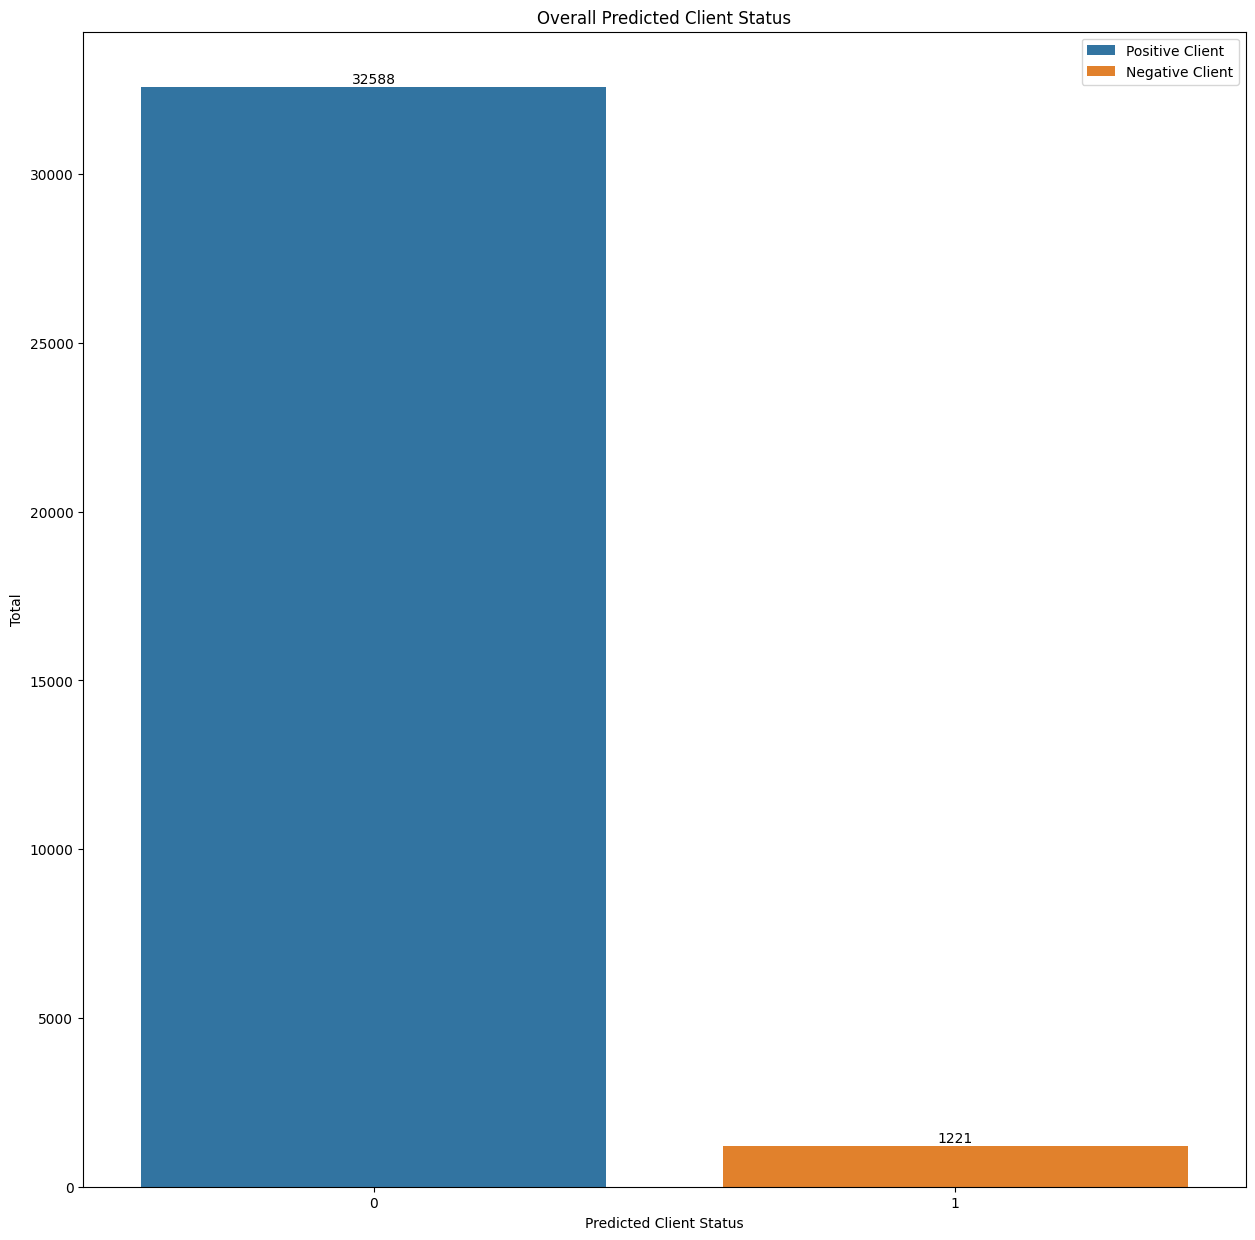

In [141]:
plt.figure(figsize=(15, 15))

count = app_test['PREDICTED_TARGET'].value_counts()
ax = sns.barplot(x=count.index, y=count.values, hue=count.index, legend=True)

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fontsize=10)

ax.set_title('Overall Predicted Client Status')
plt.xlabel('Predicted Client Status')
plt.ylabel('Total')

handles, labels = ax.get_legend_handles_labels()

plt.legend(handles, ['Positive Client', 'Negative Client'], loc='upper right')

plt.show()

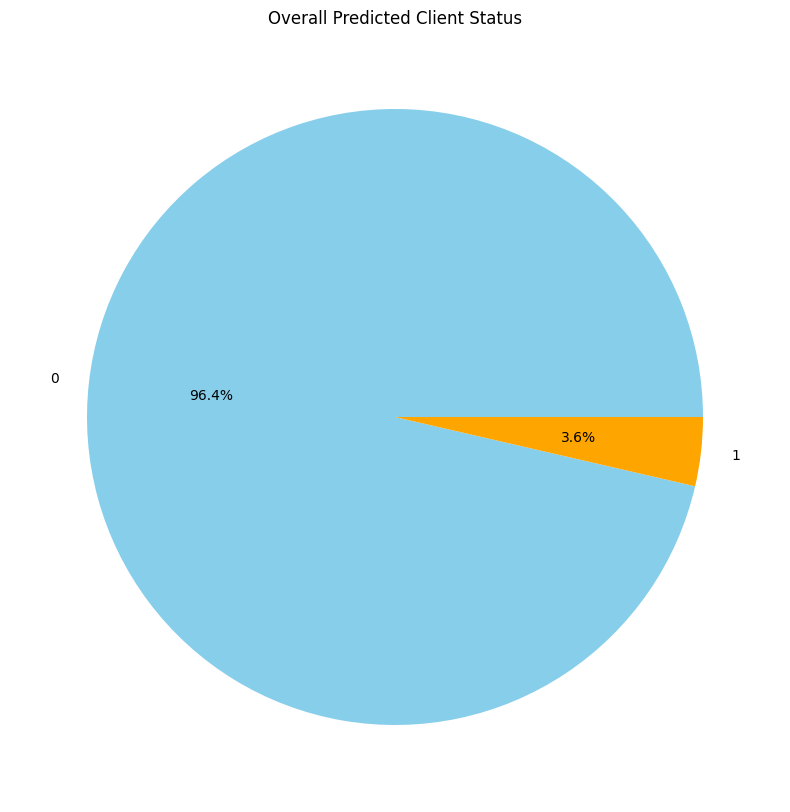

In [142]:
plt.figure(figsize=(10, 10))

# Menghitung nilai counts dari PREDICTED_TARGET
count = app_test['PREDICTED_TARGET'].value_counts()

# Membuat pie chart
plt.pie(count.values, labels=count.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])

# Menambahkan judul
plt.title('Overall Predicted Client Status')

# Menampilkan pie chart
plt.show()